In [ ]:
import os
import argparse
import pickle

parser = argparse.ArgumentParser(description='NLI training')
# paths
parser.add_argument("--data_dir", type=str, default='/home/dc/cs230_project/dataset', help="store duplicate questions")
params, _ = parser.parse_known_args()

print(params)

def save(X_train,X_valid,X_test,y_train,y_valid,y_test):
    save_single_file("X_train",X_train)
    save_single_file("X_valid",X_valid)
    save_single_file("X_test",X_test)
    save_single_file("y_train",y_train)
    save_single_file("y_valid",y_valid)
    save_single_file("y_test",y_test)
    
    
def save_single_file(filename,data):
    fh = open(filename+'.pkl', 'wb+')
    pickle.dump(data, fh)
    fh.close()
    
def load_single_file(filename):
    fh = open(os.path.join(params.data_dir,filename+'.pkl'),'rb')
    data = pickle.load(fh)
    fh.close()
    return data

def load_data():
    '''
    #df = df.loc[ (df['q1_len'] > 10) & (df['q2_len'] > 10)]
    '''
    X_train = load_single_file("X_train")
    X_valid = load_single_file("X_valid")
    X_test = load_single_file("X_test")
    y_train = load_single_file("y_train")
    y_valid = load_single_file("y_valid")
    y_test = load_single_file("y_test")
    return X_train, X_valid, X_test, y_train,y_valid, y_test
    
def make_dataset(path):
    '''
    input: path: path where quora_duplicate.tsv
    output: train, dev, valid tsv datasets
    '''
    input_file = 'quora_duplicate_questions.tsv'
    df = pd.read_csv(os.path.join(path,input_file),sep='\t')
    df = df.drop(["id","qid1","qid2"],axis=1)
    print(df.head())
    print(f"num rows dataframe:{len(df)}")
    print(df.values.shape)
    #drop rows which have 0 in either column. Must be populated wq1 and q2
    #lowercase and split dataframe
    #df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
    #keep capital letters,
    X_train, X_test, y_train, y_test = train_test_split(df[['question1','question2']].values, df[['is_duplicate']].values, test_size=0.40, random_state=42)
    X_test,X_valid,y_test,y_valid = train_test_split(X_test, y_test, test_size=0.50, random_state=42)
    print(f"X_train.shape:{X_train.shape} X_train.shape:{y_train.shape}")
    print(f"X_test.shape:{X_test.shape} y_test.shape:{y_test.shape}")
    print(f"X_valid.shape:{X_valid.shape} y_valid.shape:{y_valid.shape}")
    
    print(X_train[:6],y_train[:6])
    print('---------------------')
    print(X_test[:6],y_test[:6])
    print('---------------------')
    print(X_valid[:6],y_valid[:6])
    
    return X_train,X_valid,X_test,y_train,y_valid,y_test
    
#X_train,X_valid,X_test,y_train,y_valid,y_test = make_dataset('/home/dc/cs230_project')
#save(X_train,X_valid,X_test,y_train,y_valid,y_test)
X_train,X_valid,X_test,y_train,y_valid,y_test = load_data()
print(type(X_train),X_train.shape,type(y_train),y_train.shape)
print(type(X_valid),X_valid.shape,type(y_valid),y_valid.shape)
print(type(X_test),X_test.shape,type(y_test),y_test.shape)

In [ ]:
#reforamt into q1 and q2 because the questions have different lengt

def format_data(X_train, X_valid,X_test, y_train,y_valid,y_test):
    s1 = {}
    s2 = {}
    target = {}
    s1['train'],s1['dev'],s1['test'],s2['train'],s2['dev'],s2['test'] = {},{},{},{},{},{}
    target['train'],target['dev'],target['test']={},{},{}

    s1['train']['sent'] = [x for x in X_train[:,0]]
    s2['train']['sent'] = [x for x in X_train[:,1]]
    s1['dev']['sent'] = [x for x in X_valid[:,0]]
    s2['dev']['sent'] = [x for x in X_valid[:,1]]
    s1['test']['sent'] = [x for x in X_test[:,0]]
    s2['test']['sent'] = [x for x in X_test[:,1]]
    target['train']['data'] = np.array([x[0] for x in y_train])
    target['dev']['data'] = np.array([x[0] for x in y_valid])
    target['test']['data'] = np.array([x[0] for x in y_test.tolist()])

    train = {'s1': s1['train']['sent'], 's2': s2['train']['sent'],
             'label': target['train']['data']}
    dev = {'s1': s1['dev']['sent'], 's2': s2['dev']['sent'],
           'label': target['dev']['data']}
    test = {'s1': s1['test']['sent'], 's2': s2['test']['sent'],
            'label': target['test']['data']}
    return train,dev,test


In [ ]:
X_train,X_valid,X_test,y_train,y_valid,y_test = load_data()
train,valid,test = format_data(X_train, X_valid,X_test, y_train,y_valid,y_test)
print(type(train),type(valid),type(test))
print(type(train['s1']),type(train['s2']),type(train['label']))
print(type(valid['s1']),type(valid['s2']),type(valid['label']))
print(type(test['s1']),type(test['s2']),type(test['label']))
print(type(test['label']))
print(test['label'])
print(test['label'].shape)

In [ ]:
x = np.array([[[0], [1], [2]]])
np.squeeze(x).shape
x.shape

In [ ]:
import numpy as np

def get_word_dict(sentences):
    # create vocab of words
    word_dict = {}
    for sent in sentences:
        for word in sent.split():
            if word not in word_dict:
                word_dict[word] = ''
    word_dict['<s>'] = ''
    word_dict['</s>'] = ''
    word_dict['<p>'] = ''
    return word_dict


def get_glove(word_dict, glove_path):
    # create word_vec with glove vectors
    word_vec = {}
    with open(glove_path) as f:
        for line in f:
            word, vec = line.split(' ', 1)
            if word in word_dict:
                word_vec[word] = np.array(list(map(float, vec.split())))
    print('Found {0}(/{1}) words with glove vectors'.format(
                len(word_vec), len(word_dict)))
    return word_vec


def build_vocab(sentences, glove_path):
    word_dict = get_word_dict(sentences)
    word_vec = get_glove(word_dict, glove_path)
    print('Vocab size : {0}'.format(len(word_vec)))
    return word_vec


def get_nli(data_path):
    s1 = {}
    s2 = {}
    target = {}

    dico_label = {'entailment': 0,  'neutral': 1, 'contradiction': 2}

    for data_type in ['train', 'dev', 'test']:
        s1[data_type], s2[data_type], target[data_type] = {}, {}, {}
        s1[data_type]['path'] = os.path.join(data_path, 's1.' + data_type)
        s2[data_type]['path'] = os.path.join(data_path, 's2.' + data_type)
        target[data_type]['path'] = os.path.join(data_path,
                                                 'labels.' + data_type)

        s1[data_type]['sent'] = [line.rstrip() for line in
                                 open(s1[data_type]['path'], 'r')]
        s2[data_type]['sent'] = [line.rstrip() for line in
                                 open(s2[data_type]['path'], 'r')]
        target[data_type]['data'] = np.array([dico_label[line.rstrip('\n')]
                for line in open(target[data_type]['path'], 'r')])

        assert len(s1[data_type]['sent']) == len(s2[data_type]['sent']) == \
            len(target[data_type]['data'])

        print('** {0} DATA : Found {1} pairs of {2} sentences.'.format(
                data_type.upper(), len(s1[data_type]['sent']), data_type))

    train = {'s1': s1['train']['sent'], 's2': s2['train']['sent'],
             'label': target['train']['data']}
    dev = {'s1': s1['dev']['sent'], 's2': s2['dev']['sent'],
           'label': target['dev']['data']}
    test = {'s1': s1['test']['sent'], 's2': s2['test']['sent'],
            'label': target['test']['data']}
    return train, dev, test

train, valid, test = get_nli("/home/dc/cs230_project/dataset/SNLI")
print(type(train),type(valid),type(test))
print(type(train['s1']),type(train['s2']),type(train['label']))
print(type(valid['s1']),type(valid['s2']),type(valid['label']))
print(type(test['s1']),type(test['s2']),type(test['label']))


In [3]:
#snli stats
import os

def num_words(text):
    return len(text.split())

snli_dir = 'dataset/SNLI'

file_name="s1.train"
with open(os.path.join(snli_dir,file_name),"r") as fh:    
    num_word = [num_words(line) for line in fh]
print(len(num_word))
print(type(num_word))

549367
<class 'list'>


In [14]:
import numpy as np
print(np.min(num_word),np.max(num_word),np.mean(num_word))

1 60 8.251292851591012


549367
<class 'list'>
0 6
Counter({1: 522769, 0: 26038, 2: 339, 3: 134, 4: 48, 5: 36, 6: 3})


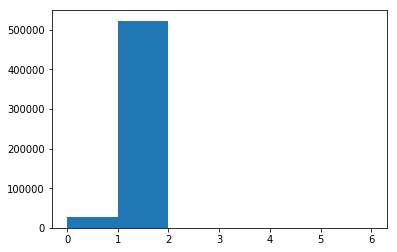

In [12]:
def num_periods(text):
    return text.count(".")

file_name="s1.train"
with open(os.path.join(snli_dir,file_name),"r") as fh:    
    num_sent = [num_periods(line) for line in fh]
print(len(num_sent))
print(type(num_sent))
print(np.min(num_sent),np.max(num_sent))
import collections
from collections import Counter

print(collections.Counter(num_sent))
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(num_sent,bins=6)
plt.show()

In [13]:
import os

def num_words(text):
    return len(text.split())

snli_dir = 'dataset/SNLI'

file_name="s2.train"
with open(os.path.join(snli_dir,file_name),"r") as fh:    
    num_word = [num_words(line) for line in fh]
print(len(num_word))
print(type(num_word))
print(np.min(num_word),np.max(num_word),np.mean(num_word))

549367
<class 'list'>
1 60 8.251292851591012


In [9]:
def num_periods(text):
    return text.count(".")

file_name="s2.train"
with open(os.path.join(snli_dir,file_name),"r") as fh:    
    num_sent = [num_periods(line) for line in fh]
print(len(num_sent))
print(type(num_sent))
print(np.min(num_sent),np.max(num_sent),np.mean(num_sent))


549367
<class 'list'>
0 7
